# TARGET project, week 1

## Project intro

### The Muon g-2 Experiment

<img src="https://news.fnal.gov/wp-content/uploads/2021/04/17-0188-17.jpeg" width=600 height=600 />


You may have heard about important results from this experiment recently, it was all over the news.  

If you're interested, you can find some more information in this article:  
https://news.fnal.gov/2021/04/first-results-from-fermilabs-muon-g-2-experiment-strengthen-evidence-of-new-physics/



The experiment stores fundamental particles, called muons (which are similar to electrons), in that big circular magnet.

### The electrostatic quadrupoles

(aka the EQs, or "quads")



An important piece for storing the particles, is the system of "electrostatic quadrupole" magnets, or simply the "quads".

It consists of 4 long plates, each kept at high-voltage.  We will call them inner, outer, top, and bottom plates, based on how they are installed.
You can see a picture of these plates here:

<img src="https://www.researchgate.net/profile/Eremey-Valetov/publication/337710563/figure/fig1/AS:832826211590144@1575572650521/Photograph-of-the-Muon-g-2-quadrupole-comprising-quadrupole-plates-trolley-rails-and-a_W640.jpg" width=500 height=500 />

### Quad plates alignment


In the experiment, it is very important to understand the electric field generated by these charged plates.  
To understand the field, we need very precise knowledge of the exact location of the quad plates.

The Fermilab Metrology Department performed a very precise laser scan to survey the location of these plates. We will be looking at the data from that laser scan in our project.


#### Design plate location

For reference, here are the design parameters of where the plates should be located, ideally.

* Distance between opposite plates (inner-outer, and top-bottom): 10 cm
* Ring radius (to the center of the storage region between the plates): R = 7.112 m
    * Therefore, the inner plate radius: r=7.062 m
    * Outer plate radius: r=7.162 m
* Top plate vertical position: +5 cm from center of storage region
* Bottom plate vertical position: -5 cm from center of storage region


## Plate location data

We will use some programming to look at the survey data for one of the plates.  
That should give us a nice overview to some programming and data science that we use in research.  


Let's look at the data!

### Opening the data file and reading the data

The blocks below are code blocks.  
They can be executed with Ctrl+Enter.  
They contain comments to explain their functionality.  

Let's open the data file that contains survey data for the bottom quad plate:

In [112]:
## get the data file from an online location
try:
    import urllib.request as urllib2
except ImportError:
    import urllib2
target_url='https://raw.githubusercontent.com/ManolisKar/TARGET_2021_project/main/Bot-quad.dat'
datafile = urllib2.urlopen(target_url)


(This code would be much simpler if the file was local. Here we need some more lines to grab the file from an online location. Don't worry about coding details in this cell.)

Now we read the data from the file to look at it:

In [113]:
## Read the file contents:
file_content = datafile.read().decode('utf-8')

## Print the data that was in the file
print( file_content )

## We got all data, now we can close the file 
datafile.close()


10000  7.119591  -43.861974  -0.050597
10002  7.109183  -43.862086  -0.051016
10003  7.104015  -43.862473  -0.051040
10004  7.098773  -43.862775  -0.051113
10005  7.093689  -43.863195  -0.051118
10006  7.106570  -43.826930  -0.050626
10007  7.101258  -43.827594  -0.050677
10008  7.096174  -43.828266  -0.050704
10009  7.091082  -43.828808  -0.050810
10010  7.117439  -43.496798  -0.049824
10011  7.112304  -43.496697  -0.050288
10012  7.107279  -43.497514  -0.050325
10013  7.102085  -43.498288  -0.050393
10014  7.097039  -43.499116  -0.050429
10015  7.091909  -43.500069  -0.050411
10016  7.130997  -43.483444  -0.049680
10017  7.125889  -43.483640  -0.050030
10018  7.121251  -43.465616  -0.050095
10019  7.135442  -43.457396  -0.049630
10020  7.115580  -43.459214  -0.050141
10021  7.110019  -43.460044  -0.050152
10022  7.104994  -43.460725  -0.050193
10023  7.099841  -43.461472  -0.050219
10024  7.094574  -43.462189  -0.050267
10025  7.130573  -43.442173  -0.050066
10026  7.125549  -43.4427

It looks like there 4 parameters for each measurement point in the data:
* The first is an id number for each measurement
    * this one is not very useful and we don't need it
* The second is the radius r of the measured location, ie distance from the center of the ring. 
    * It is in meters, and it should be around 7.112 m
* The third is the angle θ of the measured point, in cylindrical coordinates.
    * With a radius and an angle we can find any point on a given plane. This is equivalent to (x,y) coordinates.
    * The angle is given in degrees. The angular extent of the plate is around 13 degrees.
* The fourth parameter is the vertical location z of the measured point.
    * It is given in cm.

#### <font color='red'> Question </font>
The angular extent of a plate is around 13 degrees.  
Can you calculate how long it is in meters, since you know the radius of the ring?

Now that we know the format of the data, let's read it into variables:

In [114]:
## Lets read the r, theta, z parameters
r,theta,z=[],[],[]
for line in file_content.split('\n'):
    try:
        # split the line to its components, and assign them to temporary variables
        i,temp_r,temp_theta,temp_z = line.split()
        # then add the values to the full lists:
        r.append(float(temp_r) )
        theta.append(float(temp_theta))
        z.append(float(temp_z))
    except ValueError:
        continue

### Examining the data

We now hold the measurement location data in the r, theta, z variables, which are "lists" of values.

In [115]:
type(r)

list

With these variables, we have a lot of power in our hands!  
Lets import some numerical and plotting tools.

In [131]:
%matplotlib inline
## numpy and matplotlib are very useful python "modules"
import numpy as np
import matplotlib.pyplot as plt

It is very useful to turn the data into "numpy" arrays, for easier mathematical operations on them.

In [122]:
r=np.array(r)
theta=np.array(theta)
z=np.array(z)

We can very simply plot a variable:

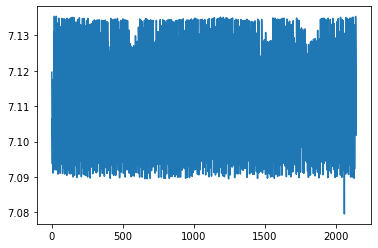

In [132]:
plt.plot(r)

Or we can histogram it:

<IPython.core.display.Javascript object>


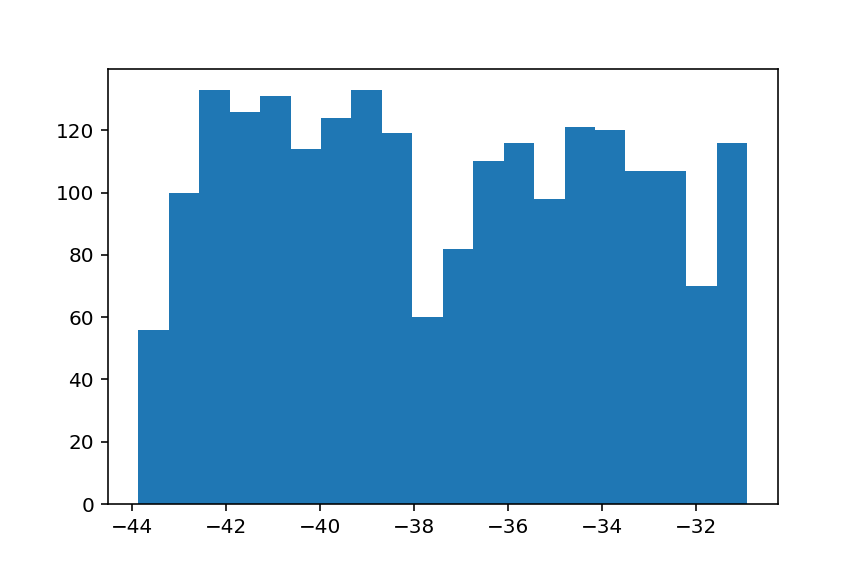

(array([ 56., 100., 133., 126., 131., 114., 124., 133., 119.,  60.,  82.,
        110., 116.,  98., 121., 120., 107., 107.,  70., 116.]),
 array([-43.863195 , -43.2159827, -42.5687704, -41.9215581, -41.2743458,
        -40.6271335, -39.9799212, -39.3327089, -38.6854966, -38.0382843,
        -37.391072 , -36.7438597, -36.0966474, -35.4494351, -34.8022228,
        -34.1550105, -33.5077982, -32.8605859, -32.2133736, -31.5661613,
        -30.918949 ]),
 <BarContainer object of 20 artists>)

In [124]:
plt.hist(theta,bins=20)

You can find many resources on plotting capabilities in this overview:
https://matplotlib.org/stable/tutorials/introductory/sample_plots.html#sphx-glr-tutorials-introductory-sample-plots-py

#### <font color='red'> Exercise </font>

Examine the data by yourself, by plotting the variables in different ways.  
It is very useful to plot variables against one another.  

* From the link above, or from googling, try to do a "scatter plot" of one variable against another. (there is a "Scatter plots" section in the link)

* Specifically, plot the vertical location z of the plate versus the angular location theta.

* What can you tell about the plate location?



## 3D plotting

You can easily find things online for anything you want to do in python.  
For example, say you want to plot the plate location in 3 dimensions.  A nice overview like below can be found with simple googling:

https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

Let's follow instructions in that tutorial to do some 3D plotting:

In [133]:
from mpl_toolkits import mplot3d

Lets turn the cylindrical (r,theta) coordinates into simpler (x,y) coordinates:

In [134]:
x=r*np.cos(theta * np.pi / 180.)
y=r*np.sin(theta * np.pi / 180.)

#### <font color='red'> Exercise </font>

* Try to plot a 3-dimensional picture of the plate x,y,z coordinates.  
    * Look for the Surface Triangulations section in the link above, and do a scatter plot.
* Can you also use a function to connect the scattered points into a surface?  


That will give us a very realistic data view of what the plate actually looks like.



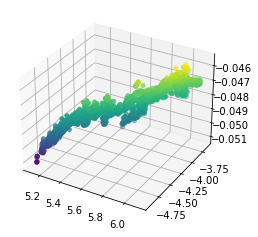

In [135]:
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);

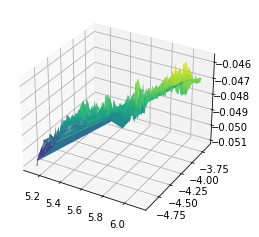

In [136]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z,
                cmap='viridis', edgecolor='none');


<IPython.core.display.Javascript object>


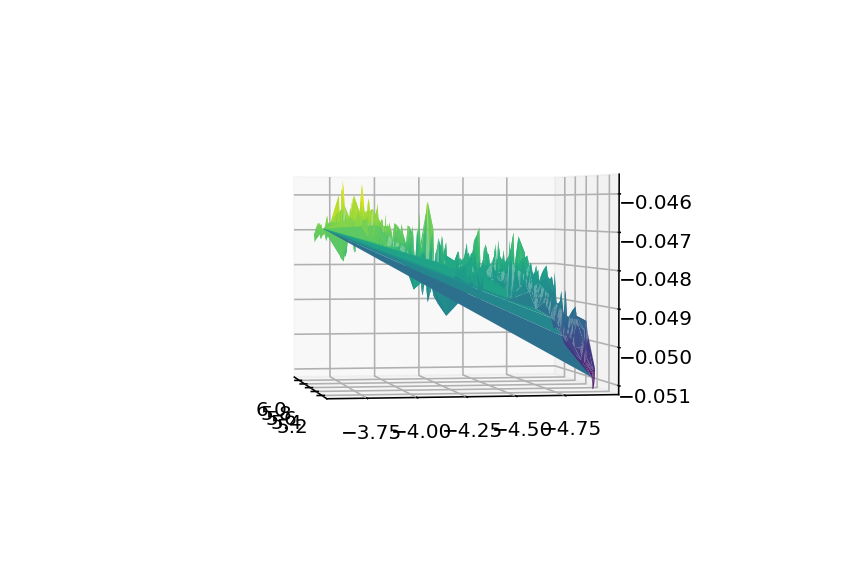

In [137]:
%matplotlib notebook
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z,
                cmap='viridis', edgecolor='none')